# Real Estate Property Price Prediction Model


This Linear Regression model shall predict the Housing Property price using one of its features and shall also show the accuracy in calculation.

In [1]:
#Importing the requisite Libraries/Packages:
import pandas as pd
import numpy as np
import seaborn as sbn
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

### Importing the Dataset : 

In [2]:
#Reading the .csv data file using pandas into its data structure i.e.'DataFrames':
df=pd.read_csv("Housing.csv")

### Superficial Data Analysis :

In [3]:
#Displaying the first 5 rows of our data stored in the DataFrame:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#Collecting the superficial knowledge of our data calculated over the values present in each column:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
#Inspecting the data for the null values or no-value column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Graphical Data Analysis : 

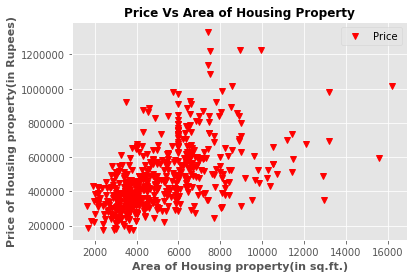

In [6]:
#Analysing the relation between 'Attributes(Area)' and 'Labels(Price)' using py plots: 
plt.style.use('ggplot')
plt.plot(df.area,df.price/10,'v',color='red')
plt.title("Price Vs Area of Housing Property",fontweight='bold',fontsize='12')
plt.xlabel('Area of Housing property(in sq.ft.)',fontweight='bold',fontsize='11')
plt.ylabel('Price of Housing property(in Rupees)',fontweight='bold',fontsize='11') 
plt.legend(['Price'])
plt.savefig("HousingPrice_Vs_Area_Plot.png")

Note: This plot gives us an understanding that in our data, majority of the properties have an area of approx 4000 sq.ft. with a price range of 25 lacs to 45 lacs. 

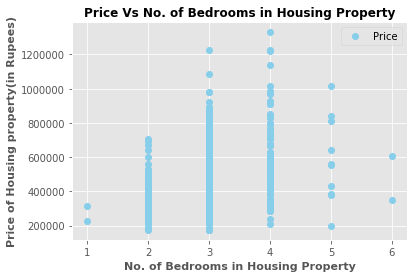

In [7]:
#Analysing the relation between 'Attributes(No. of Bedrooms)' and 'Labels(Price)' using py plots:
plt.style.use('ggplot')
plt.plot(df.bedrooms,df.price/10,'o',color='skyblue')
plt.title("Price Vs No. of Bedrooms in Housing Property",fontweight='bold',fontsize='12')
plt.xlabel('No. of Bedrooms in Housing Property',fontweight='bold',fontsize='11')
plt.ylabel('Price of Housing property(in Rupees)',fontweight='bold',fontsize='11')
plt.legend(['Price'])
plt.savefig("HousingPrice_Vs_No.ofBedroom_Plot.png")

Note: This plot gives us an understanding that in our data, the properties having '4' bedrooms have been sold for maximum price(approx 1.35 Crores). 

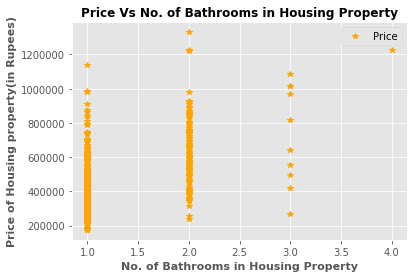

In [8]:
#Analysing the relation between 'Attributes(No. of Bathrooms)' and 'Labels(Price)' using py plots:
plt.style.use('ggplot')
plt.plot(df.bathrooms,df.price/10,'*',color='orange')
plt.title("Price Vs No. of Bathrooms in Housing Property",fontweight='bold',fontsize='12')
plt.xlabel('No. of Bathrooms in Housing Property',fontweight='bold',fontsize='11')
plt.ylabel('Price of Housing property(in Rupees)',fontweight='bold',fontsize='11')
plt.legend(['Price'])
plt.savefig("HousingPrice_Vs_No.ofBathroom_Plot.png")

Note: This plot gives us an understanding that in our data, the properties having '2' bathrooms have been sold for maximum price(approx 1.35 Crores).

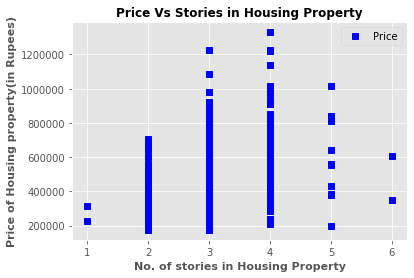

In [9]:
#Analysing the relation between 'Attributes(Stories)' and 'Labels(Price)' using py plots:
plt.style.use('ggplot')
plt.plot(df.bedrooms,df.price/10,'s',color='blue')
plt.title("Price Vs Stories in Housing Property",fontweight='bold',fontsize='12')
plt.xlabel('No. of stories in Housing Property',fontweight='bold',fontsize='11')
plt.ylabel('Price of Housing property(in Rupees)',fontweight='bold',fontsize='11')
plt.legend(['Price'])
plt.savefig("HousingPrice_Vs_Stories.png")

Note: This plot gives us an understanding that in our data, the properties having '4' stories have been sold for maximum price(approx 1.35 Crores).

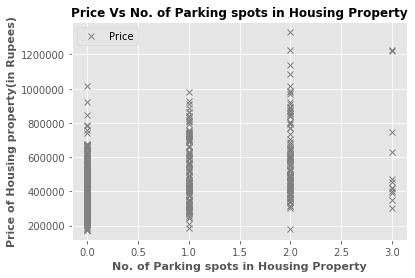

In [10]:
#Analysing the relation between 'Attributes(No. of Parking Spots)' and 'Labels(Price)' using py plots:
plt.style.use('ggplot')
plt.plot(df.parking,df.price/10,'x',color='grey')
plt.title("Price Vs No. of Parking spots in Housing Property",fontweight='bold',fontsize='12')
plt.xlabel('No. of Parking spots in Housing Property',fontweight='bold',fontsize='11')
plt.ylabel('Price of Housing property(in Rupees)',fontweight='bold',fontsize='11')
plt.legend(['Price'])
plt.savefig("Housing_Vs_Parking Spots_Plot.png")

Note: This plot gives us an understanding that in our data, the properties having '2' parking spots have been sold for maximum price(approx 1.35 Crores). 

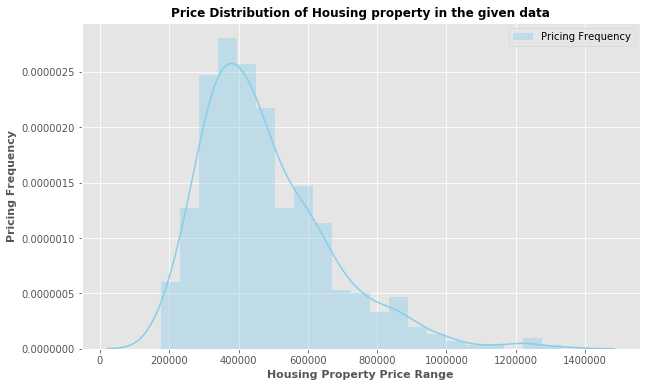

In [11]:
#Analysing the distribution of data('price') using Distribution Histograms and their curves to know the approx mean:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.tight_layout()
sbn.distplot(df.price/10,color='skyblue')
plt.title("Price Distribution of Housing property in the given data",fontweight='bold',fontsize='12')
plt.legend(['Pricing Frequency'])
plt.xlabel('Housing Property Price Range',fontweight='bold',fontsize='11')
plt.ylabel("Pricing Frequency",fontweight='bold',fontsize='11')
plt.savefig("Pricing Distribution Curve.png")

Note: This plot gives us an understanding that the 'Price' values in our data have been distributed as an almost Bell-shaped cuve(Gaussian curve), have their mean of approx 45 lacs and the maximum properties have their pricing of around 40 lacs.

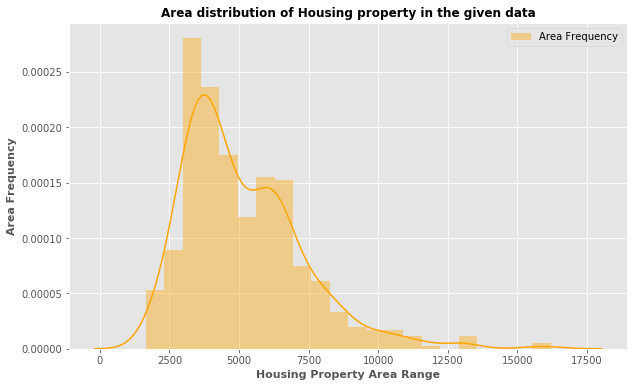

In [12]:
#Analysing the distribution of data('Area') using Distribution Histograms and their curves to know the approx mean:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.tight_layout()
sbn.distplot(df.area,color='orange')
plt.title('Area distribution of Housing property in the given data',fontweight='bold',fontsize='12')
plt.xlabel('Housing Property Area Range',fontweight='bold',fontsize='11')
plt.ylabel('Area Frequency',fontweight='bold',fontsize='11')
plt.legend(['Area Frequency'])
plt.savefig("Area Distribution Curve.png")

Note: This plot gives us an understanding that the 'Area' values in our data have been distributed as an almost Bell-shaped cuve(Gaussian curve), have their mean of approx 50 lacs and the maximum properties have their areas of around 3000 sq.ft.

###  Attributes and Labels :

In [13]:
#Storing the values of 'Attributes(Area series)' and 'Labels(Price series)' from the DataFrame into variables and reshapping them from 'Series' to 'Arrays': 
x=df.area.values.reshape(-1,1)
y=df.price.values.reshape(-1,1)

### Training and Testing Dataset :

In [14]:
#Splitting the data into the Training Data set and Testing Data set:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

### Model Training : 

In [15]:
#Creating an instance of Linear Regression class and fitting our data into the fit() method to train our model using Training Dataset:
rgr=LinearRegression()
rgr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Optimal Intercept :

In [16]:
#Printing the Intercept(c) of our Best fitting line(Regression Line):
print(rgr.intercept_)

[2329244.91349515]


### Optimal Coefficient : 

In [17]:
#Printing the Coefficient(m) of our Best fitting line(Regression Line):
rgr.coef_

array([[475.26784571]])

### Model Testing & Error Calculation :

In [18]:
#Testing our model using the Testing Dataset, predicting the values of 'Labels' by inputting 'Attributes' into our model and calculating the errors:
y_predicted=rgr.predict(x_test)
df1=pd.DataFrame({'Actual Value':y_test.flatten(),'Predicted Value':y_predicted.flatten(),'Absolute Error':(y_predicted.flatten()-y_test.flatten()),'Squared Error':(y_predicted.flatten()-y_test.flatten())**2})
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
df1.head()

Mean Absolute Error: 1026553.7662016952
Mean Squared Error: 1997672371756.0862
Root Mean Squared Error: 1413390.3819384389


,Actual Value,Predicted Value,Absolute Error,Squared Error
0,4585000,4.230316e+06,-3.546837e+05,1.258005e+11
1,6083000,6.901322e+06,8.183216e+05,6.696502e+11
2,4007500,3.973672e+06,-3.382834e+04,1.144357e+09
3,6930000,8.602780e+06,1.672780e+06,2.798195e+12
4,2940000,4.068725e+06,1.128725e+06,1.274021e+12


### Graphical Depiction of Model Inaccuracy :

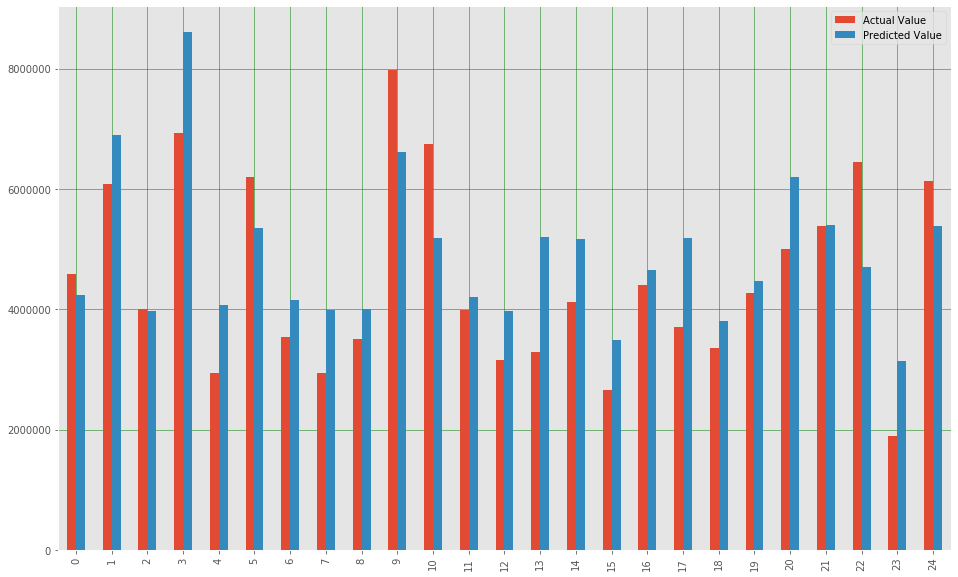

In [19]:
#Graphical representation of Actual and Predicted Values to analyse the deviation of Model using Bar Graphs:
df2=df1.head(25)
df2.plot(y=['Actual Value','Predicted Value'],kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Graphical Depiction of Model Performance :

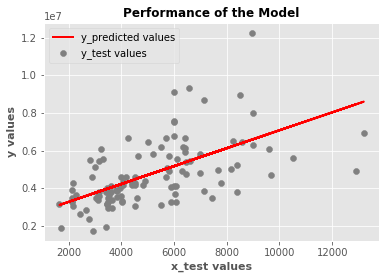

In [20]:
#Plot representation of Performance of Model:
plt.scatter(x_test, y_test,color='gray')
plt.plot(x_test, y_predicted,color='red',linewidth=2)
plt.title('Performance of the Model',fontweight='bold',fontsize='12')
plt.xlabel('x_test values',fontweight='bold',fontsize='11')
plt.ylabel('y values',fontweight='bold',fontsize='11')
plt.legend(['y_predicted values','y_test values'])
plt.savefig('Performance of Model.png')
plt.show()